# Incremental (Online) Learning with Scikit-Multiflow- upload data

## Load data from a file as a stream and save test results into a file.

In [14]:
%matplotlib notebook

In [15]:
from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTree
import matplotlib.pyplot as plt
from skmultiflow.evaluation import EvaluatePrequential

### Load the data set as a stream

In [17]:
stream = FileStream("D:/Streaming data set/streaming-datasets-master/airlines.csv")

stream.prepare_for_use()

In [18]:
tree = HoeffdingTree()

C:\Users\JaFsi\anaconda3\lib\site-packages\skmultiflow\trees\hoeffding_tree.py:35: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  "The old name will be removed in v0.7.0", category=FutureWarning)


In [19]:
correctness_dist = []
nb_iters = 1000
for i in range(nb_iters):
    X, Y = stream.next_sample()        # get the next sample 
    prediction = tree.predict(X)       # predict Y using the tree     
    if Y == prediction:                # check the prediction
        correctness_dist.append(1)
    else:
        correctness_dist.append(0)   
    tree.partial_fit(X, Y)             # update the tree

<IPython.core.display.Javascript object>


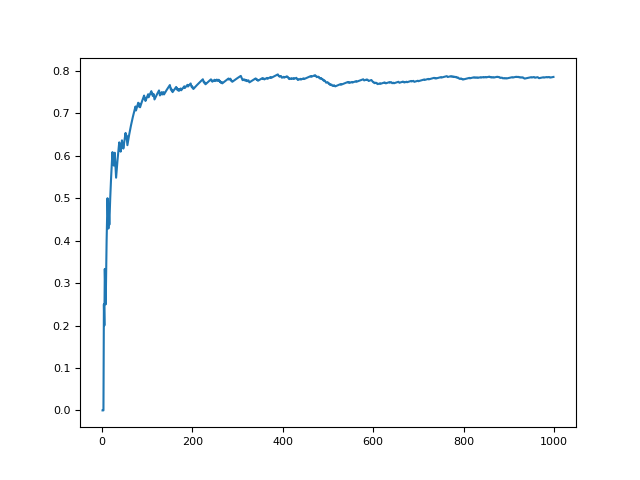

In [20]:
time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]
plt.plot(time, accuracy)

#### Alternate method

<IPython.core.display.Javascript object>


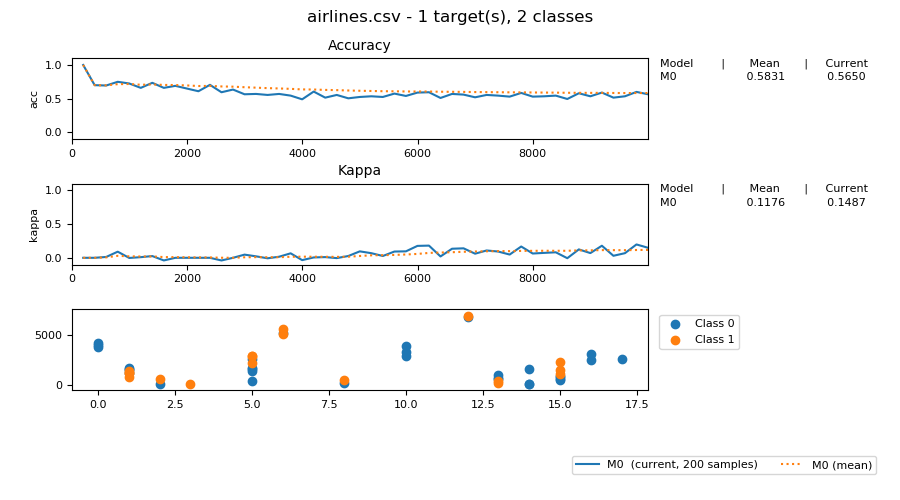

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [11.89s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.5831
M0 - Kappa        : 0.1176


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [21]:
evaluator=EvaluatePrequential(show_plot=True,
                              max_samples=10000,
                              metrics=['accuracy','kappa'],
                              output_file='airline_results.csv',
                              data_points_for_classification=True)


evaluator.evaluate(stream=stream, model=tree)